In [8]:
import pickle
import torch

with open(f'./data/openai_final_results.pkl', 'rb') as infile:
    results = pickle.load(infile)

print(results.keys())

dict_keys(['entropy', 'entropy_correct', 'sets', 'perplexity', 'perplexity_var', 'perplexity_norm', 'perplexity_correct'])


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from roc_utils import *

negent = -1*np.array(results["entropy"])
ent_correct = np.array(results["entropy_correct"]).astype(np.float32)
negperp = -1*np.array(results["perplexity"])
varperp = -1*np.array(results["perplexity_var"])
normperp = np.array(results["perplexity_norm"])
perp_correct = np.array(results["perplexity_correct"]).astype(np.float32)

print(negent)
print(ent_correct.sum() / ent_correct.shape[0])
print(negperp)
print(varperp)
print(normperp)
print(perp_correct.sum() / perp_correct.shape[0])

[1.2662301  1.2686267  1.2348063  ... 0.86139035 1.1267684  1.0833399 ]
0.6469298245614035
[-1.01104117 -1.01553123 -1.02864246 ... -1.65152186 -1.19999311
 -1.21919205]
[-8.28808517e-04 -6.09576083e-04 -9.27333857e-03 ... -9.99995541e+10
 -6.03991697e-02 -5.13209549e-02]
[1.32899486e-01 2.08125848e-01 9.86274181e-02 ... 6.51522512e-07
 1.87615932e-01 2.50593562e-01]
0.6430921052631579


In [10]:
roc1 = compute_roc(X=negent, y=ent_correct, pos_label=1.0)
roc2 = compute_roc(X=negperp, y=perp_correct, pos_label=1.0)
roc3 = compute_roc(X=normperp, y=perp_correct, pos_label=1.0)
roc4 = compute_roc(X=varperp, y=perp_correct, pos_label=1.0)
print(roc1)
print(roc2)
print(roc3)
print(roc4)

{'fpr': array([0.       , 0.       , 0.       , ..., 0.9984472, 1.       ,
       1.       ]), 'tpr': array([0.00000000e+00, 0.00000000e+00, 8.47457627e-04, ...,
       9.99152542e-01, 9.99152542e-01, 1.00000000e+00]), 'thr': array([       inf,  1.3025756,  1.302568 , ..., -6.8881474, -7.6021624,
             -inf], dtype=float32), 'auc': 0.8981432256026951, 'opd': {'minoptsym': struct(**{'ind': 1019, 'opt': 0.30253458, 'opp': (0.0, 0.864406779661017), 'opa': 0.9122807017543859, 'opo': -0.13559322033898302, 'opq': ((0, 1), (0.864406779661017, 1.8644067796610169))})}, 'inv': False}
{'fpr': array([0., 0., 0., ..., 1., 1., 1.]), 'tpr': array([0.00000000e+00, 0.00000000e+00, 8.52514919e-04, ...,
       9.98294970e-01, 9.99147485e-01, 1.00000000e+00]), 'thr': array([        inf, -1.00000415, -1.00000433, ..., -1.65152186,
       -1.70317252,        -inf]), 'auc': 0.5622826970900562, 'opd': {'minoptsym': struct(**{'ind': 872, 'opt': -1.06587134, 'opp': (0.4116743471582181, 0.5140664961636828

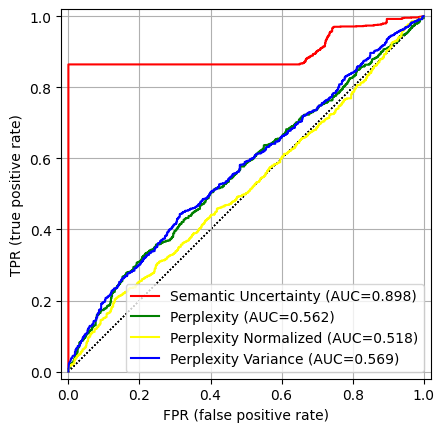

In [11]:
_, ax3 = plt.subplots()
plot_roc(roc1, label="Semantic Uncertainty", color="red", ax=ax3)
plot_roc(roc2, label="Perplexity", color="green", ax=ax3)
plot_roc(roc3, label="Perplexity Normalized", color="yellow", ax=ax3)
plot_roc(roc4, label="Perplexity Variance", color="blue", ax=ax3)

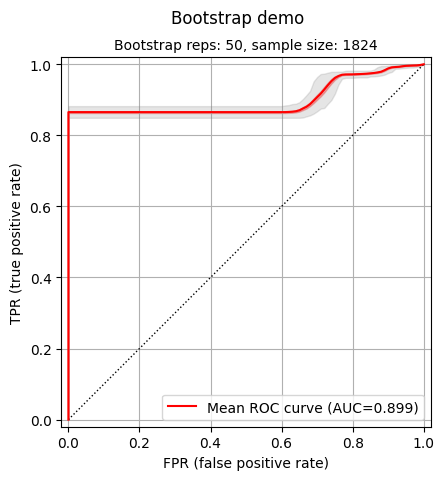

In [15]:
plot_roc_bootstrap(X=negent, y=ent_correct, pos_label=1.0,
                   n_bootstrap=50,
                   random_state=42,
                   show_boots=False,
                   title="Bootstrap demo");